In [1]:
__copyright__ = "Reiner Lemoine Institut gGmbH"
__license__   = "GNU Affero General Public License Version 3 (AGPL-3.0)"
__url__       = "https://github.com/rl-institut/OpFEl/blob/master/LICENSE"
__author__    = "AnyaHe, ricrei, a-linke"

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
from pathlib import Path
import pandas as pd
module_path = os.path.abspath(os.path.join('.'))

In [4]:
from tools import tools
from tools.plots import plot_representation_single, plot_representation_triple, \
    plot_representation_holistic, plot_boxplot, plot_bar_horizontal

In [5]:
# Load data
cur_dir = Path(os.getcwd())
table_values = pd.read_csv(os.path.join(cur_dir,'data/Evaluation_Table.csv'), sep=";").\
    set_index('Model / framework').fillna(0)
nr_of_surveys = len(table_values)

# General characteristics

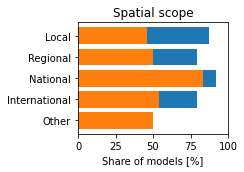

In [6]:
spatial_scope = table_values.loc[:, 'local (NUTS3)/pos':'other spatial scope'].sum()
spatial_scope['other spatial scope/pos'] = len(table_values['other spatial scope'].to_numpy().nonzero()[0])
spatial_scope['other spatial scope/used'] = len(table_values['other spatial scope'].to_numpy().nonzero()[0])

plot_bar_horizontal(
    spatial_scope, ['Local', 'Regional', 'National', 'International', 'Other'], title='Spatial scope',
    max_val=nr_of_surveys, save_fig_dir=module_path + '/plots/01a_paper_spatial_scope.pdf', no_label=True)

In [7]:
table_values['other spatial scope']

Model / framework
eGo                                          Mittelspannungsgebiete
backbone                 The geographical resolution is data driven
Calliope                                  arbitrary scales possible
DIETER                               Germany and electric neighbors
Dispa-SET                                                         0
EMMA                                                              0
EnergyPLAN                                     European/continental
EnergyScope                                                       0
oemof                                                             0
OMEGAlpes                              scale of the energy project 
PyPSA                                                             0
region4FLEX                                                       0
RTestPSM                                                          0
TIMES                                                             0
TransiEnt         It is also p

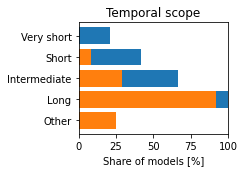

In [8]:
temporal_scope = table_values.loc[:, 'very short/pos':'other temporal scope'].sum()
temporal_scope['other temporal scope/pos'] = len(table_values['other temporal scope'].to_numpy().nonzero()[0])
temporal_scope['other temporal scope/used'] = len(table_values['other temporal scope'].to_numpy().nonzero()[0])

plot_bar_horizontal(
    temporal_scope, ['Very short', 'Short', 'Intermediate', 
                     'Long', 'Other'], title='Temporal scope',
    max_val=nr_of_surveys, no_label=True, save_fig_dir=module_path + '/plots/01b_paper_temporal_scope.pdf')


In [9]:
table_values['other temporal scope']

Model / framework
eGo                                                               0
backbone                          The temporal scope is data driven
Calliope                                                          0
DIETER                                                            0
Dispa-SET                                                         0
EMMA                                                              0
EnergyPLAN                  The model simulates specifically a year
EnergyScope                            decades (long term planning)
oemof                                                             0
OMEGAlpes                      depending on the used/available data
PyPSA                                                             0
region4FLEX                                                       0
RTestPSM                                                          0
TIMES                                                             0
TransiEnt                     

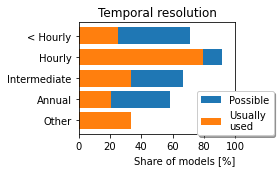

In [10]:
temporal_resolution = table_values.loc[:, '<hourly/pos':'other temporal resolution'].sum()
temporal_resolution['other temporal resolution/pos'] = len(table_values['other temporal resolution'].to_numpy().nonzero()[0])
temporal_resolution['other temporal resolution/used'] = len(table_values['other temporal resolution'].to_numpy().nonzero()[0])

plot_bar_horizontal(
    temporal_resolution, ['< Hourly', 'Hourly', 'Intermediate', 'Annual', 'Other'], title='Temporal resolution',
    max_val=nr_of_surveys, save_fig_dir=module_path + '/plots/01c_paper_temporal_resolution.pdf', figsize=(4., 2.5))

In [11]:
table_values['other temporal resolution']

Model / framework
eGo                                                               0
backbone                     The temporal resolution is data driven
Calliope                                                          0
DIETER                                                            0
Dispa-SET                                                         0
EMMA                                                              0
EnergyPLAN                                                        0
EnergyScope            we use a hourly time slice with typical days
oemof                                                             0
OMEGAlpes                      depending on the used/available data
PyPSA                                                             0
region4FLEX                                                       0
RTestPSM                                                          0
TIMES                                  Flexible temporal hierarchy 
TransiEnt                     

# Evaluation of flexibility representation 

In [12]:
models = table_values.index

**Definition of fulfillment criteria. Further described in methodology.**

In [13]:
evaluation_parameters = tools.default_evaluation_parameters()

## Supply representation

In [14]:
parameters_with_weights_supply = {
    'Technology\nrepresentation': {'coal': 1, 'lignite': 1, 'oil': 1, 'natural gas': 1, 'CCGT': 1,
               'OCGT': 1, 'bioenergy': 1, 'Hydro reservoir': 1, 'geothermal energy': 1,
               'concentrated solar': 1, 'photovoltaic': 1, 'wind onshore': 1,
               'wind offshore': 1, 'river hydro': 1, 'wave power': 1, 'tidal power': 1,
               'PEM-FC': 1, 'SOFC': 1, 'nuclear': 1},
    'Detailed\ncharacteristics': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1, 'discrete capacity expansion': 1, 'curtailed operation': 1,
               'minimum load': 1}
}

In [15]:
weighted_models_supply_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_supply, evaluation_parameters, table_values)

In [16]:
rating_supply = weighted_models_supply_df.sum(axis=1).divide(2)
rating_supply.sort_values(ascending=False)*100

TransiEnt         94.736842
Dispa-SET         79.699248
Calliope          79.135338
PyPSA             79.135338
DIETER            76.127820
backbone          75.000000
Balmorel          70.676692
region4FLEX       66.353383
Frigg             64.285714
TIMES             64.285714
IRENA FlexTool    61.842105
xeona             61.466165
OSeMOSYS          60.714286
urbs              57.142857
EnergyScope       52.819549
EnergyPLAN        52.819549
oemof             51.315789
eGo               39.661654
OMEGAlpes         39.285714
EMMA              35.150376
RTestPSM          34.962406
GridCal           25.000000
pandapower        25.000000
FlexiGIS          23.496241
dtype: float64

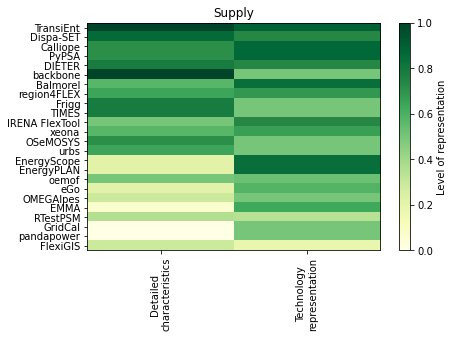

In [17]:
# Plot all models
plot_representation_single(
    weighted_models_supply_df.loc[rating_supply.sort_values(ascending=False).index], 'Supply')

### Detailed Evaluation

In [18]:
parameters_with_weights_supply_tech = {
    'Conventional': {'coal': 1, 'lignite': 1, 'oil': 1, 'natural gas': 1, 'CCGT': 1,
               'OCGT': 1, 'nuclear': 1},
    'Dispatchable\nRES':{'bioenergy': 1, 'Hydro reservoir': 1, 'geothermal energy': 1,
               'concentrated solar': 1},
    'Variable\nRES':{'photovoltaic': 1, 'wind onshore': 1,
               'wind offshore': 1, 'river hydro': 1, 'wave power': 1, 'tidal power': 1},
    'Fuel cells':{'PEM-FC': 1, 'SOFC': 1}
}

In [19]:
parameters_with_weights_supply_char = {
    'Technology\nspecifications':{'curtailed operation': 1, 'minimum load': 1},
    'Operations': {'efficiency': 1, 'ramping': 1, 'response time': 1, 'recovery time': 1},
    'Discrete\nexpansion': {'discrete capacity expansion': 1,}
}

In [20]:
weighted_models_supply_tech_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_supply_tech, evaluation_parameters, table_values)
weighted_models_supply_char_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_supply_char, evaluation_parameters, table_values)

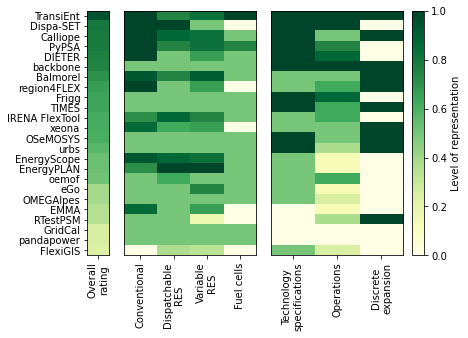

In [21]:
rating_supply_df = pd.DataFrame(rating_supply.sort_values(ascending=False)).rename(columns={0:'Overall\nrating'})
plot_representation_triple(rating_supply_df, 
    weighted_models_supply_tech_df[parameters_with_weights_supply_tech.keys()].loc[
        rating_supply.sort_values(ascending=False).index], 
    weighted_models_supply_char_df[parameters_with_weights_supply_char.keys()].loc[
        rating_supply.sort_values(ascending=False).index], figsize=(6.5,4.8),
    save_fig_dir=module_path + '/plots/02_supply.pdf' )

## Demand representation

In [22]:
# Demand dict
parameters_with_weights_demand = {
    'Technology\nrepresentation': {'households': 1, 'industrial load': 1, 'service sector': 1},
    'Detailed\ncharacteristics': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1, 'maximum deferrable load': 1, 'shifting time': 1,
               'price elasticity': 1}
}

In [23]:
weighted_models_demand_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_demand, evaluation_parameters, table_values)
rating_demand = weighted_models_demand_df.sum(axis=1).divide(2)
rating_demand.sort_values(ascending=False)*100

Balmorel          85.714286
region4FLEX       82.142857
DIETER            82.142857
Frigg             79.761905
FlexiGIS          71.428571
xeona             69.047619
backbone          67.857143
TIMES             64.285714
PyPSA             58.333333
oemof             57.142857
Calliope          55.952381
TransiEnt         53.571429
Dispa-SET         48.809524
OSeMOSYS          46.428571
IRENA FlexTool    45.238095
urbs              45.238095
EnergyPLAN        36.904762
EnergyScope       33.333333
eGo               28.571429
GridCal           25.000000
pandapower        25.000000
OMEGAlpes         23.809524
EMMA              17.857143
RTestPSM          13.095238
dtype: float64

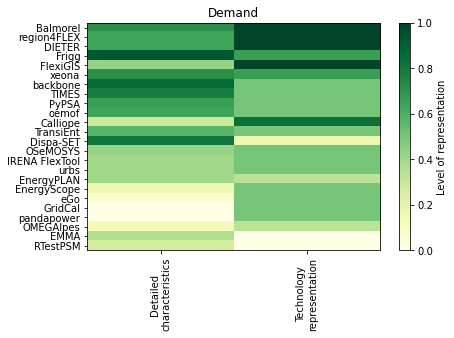

In [24]:
# Plot all models
plot_representation_single(
    weighted_models_demand_df.loc[rating_demand.sort_values(ascending=False).index], 'Demand')

### Detailed Evaluation

In [25]:
# Demand dict
parameters_with_weights_demand_tech = {
    'Household': {'households': 1}, 
    'Industry': {'industrial load': 1}, 
    'Service': {'service sector': 1}}
parameters_with_weights_demand_char = {
    'Technology\nspecifications':{'maximum deferrable load': 1, 'shifting time': 1},
    'Operations': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1}, 
    'Price\nelasticity': {'price elasticity': 1}
}

In [26]:
weighted_models_demand_tech_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_demand_tech, evaluation_parameters, table_values)
weighted_models_demand_char_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_demand_char, evaluation_parameters, table_values)

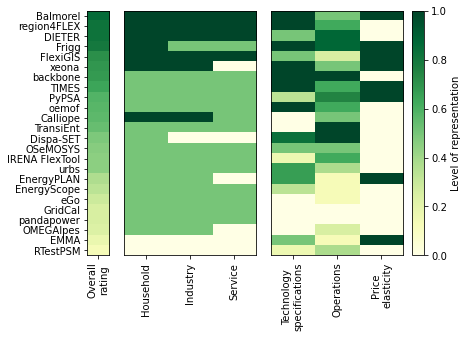

In [27]:
# plot all dual
rating_demand_df = pd.DataFrame(rating_demand.sort_values(ascending=False)).rename(columns={0:'Overall\nrating'})
plot_representation_triple(rating_demand_df,
    weighted_models_demand_tech_df[parameters_with_weights_demand_tech.keys()].loc[
        rating_demand.sort_values(ascending=False).index], 
    weighted_models_demand_char_df[parameters_with_weights_demand_char.keys()].loc[
        rating_demand.sort_values(ascending=False).index], figsize=(6.5,4.8),
    save_fig_dir=module_path + '/plots/03_demand.pdf')

## Storage representation

In [28]:
#Storage dict
parameters_with_weights_storage = {
    'Technology\nrepresentation': {'Batteries': 1,  'PHS': 1, 'CAES': 1, 'Caps': 1,
                            'Flywheels': 1},
    'Detailed\ncharacteristics': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1, 'storage implementation': 1, 'aging': 1,
                'self discharge': 1}
}

In [29]:
weighted_models_storage_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_storage, evaluation_parameters, table_values)
rating_storage = weighted_models_storage_df.sum(axis=1).divide(2)
rating_storage.sort_values(ascending=False)*100

TransiEnt         92.857143
PyPSA             70.714286
Dispa-SET         69.285714
backbone          67.857143
oemof             65.714286
DIETER            65.714286
Calliope          65.000000
Frigg             64.285714
xeona             58.571429
Balmorel          57.142857
TIMES             57.142857
region4FLEX       52.142857
IRENA FlexTool    51.428571
EnergyScope       49.285714
OSeMOSYS          46.428571
urbs              46.428571
OMEGAlpes         42.857143
EnergyPLAN        42.142857
EMMA              34.285714
eGo               32.142857
FlexiGIS          31.428571
GridCal           28.571429
pandapower        28.571429
RTestPSM          10.714286
dtype: float64

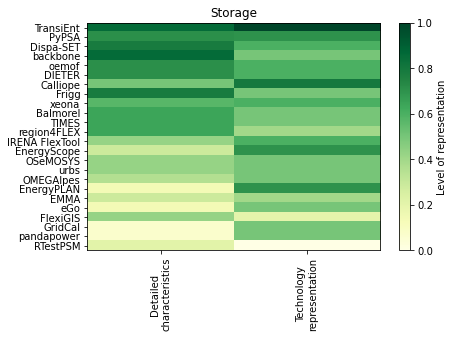

In [30]:
# Plot all models
plot_representation_single(
    weighted_models_storage_df.loc[rating_storage.sort_values(ascending=False).index], 'Storage')

### Detailed Evaluation

In [31]:
#Storage dict
parameters_with_weights_storage_tech = {
    'Long term': {'PHS': 1, 'CAES': 1}, 
    'Medium term': {'Batteries': 1},  
    'Short term': {'Caps': 1, 'Flywheels': 1},}
parameters_with_weights_storage_char = {
    'Technology\nspecifications': {'aging': 1, 'self discharge': 1}, 
    'Storage\nimplementation': {'storage implementation': 1},
    'Operations': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1}
}

In [32]:
weighted_models_storage_tech_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_storage_tech, evaluation_parameters, table_values)
weighted_models_storage_char_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_storage_char, evaluation_parameters, table_values)

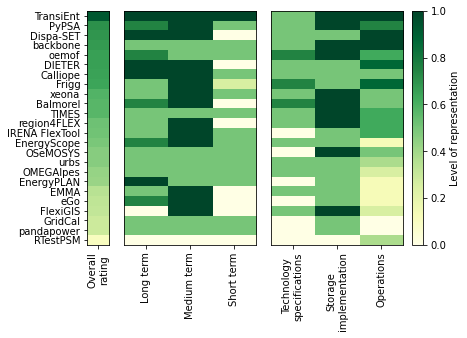

In [33]:
# plot all dual
rating_storage_df = pd.DataFrame(rating_storage.sort_values(ascending=False)).rename(columns={0:'Overall\nrating'})
plot_representation_triple(rating_storage_df,
    weighted_models_storage_tech_df[parameters_with_weights_storage_tech.keys()].loc[
        rating_storage.sort_values(ascending=False).index], 
    weighted_models_storage_char_df[parameters_with_weights_storage_char.keys()].loc[
        rating_storage.sort_values(ascending=False).index], figsize=(6.5,4.8),
    save_fig_dir=module_path + '/plots/04_storage.pdf')

## Sector coupling representation

In [34]:
#Sector coupling dict
parameters_with_weights_sector = {
    'Technology\nrepresentation': {
        'P2H2': 1, 'HP': 1, 'EV': 1, 'Fuels': 1, 'Heat storage': 1,
        'V2G': 1, 'CHP': 1},
    'Detailed\ncharacteristics': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1, 'Heat': 1, 'Transport': 1,
                                   'sector coupling supply': 1,
                                   'sector coupling demand': 1,
                                   'sector coupling storage': 1},
}

In [35]:
weighted_models_sector_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_sector, evaluation_parameters, table_values)
rating_sector = weighted_models_sector_df.sum(axis=1).divide(2)
rating_sector.sort_values(ascending=False)*100

Other heat representation specified in model backbone. Please check.
Other transport representation specified in model backbone. Please check.
Model Calliope has not ticket any value for max def load.
Other heat representation specified in model DIETER. Please check.
Other transport representation specified in model DIETER. Please check.
Other heat representation specified in model Dispa-SET. Please check.
Other transport representation specified in model Dispa-SET. Please check.
heat sector not specified for model OMEGAlpes.
Other heat representation specified in model OMEGAlpes. Please check.
Model OMEGAlpes has not ticket any value for max def load.
Other heat representation specified in model region4FLEX. Please check.
Other transport representation specified in model region4FLEX. Please check.
Other heat representation specified in model TransiEnt. Please check.
Other heat representation specified in model xeona. Please check.
Other heat representation specified in model FlexiGIS.

Dispa-SET         88.271605
PyPSA             85.493827
region4FLEX       84.259259
Frigg             83.597884
TransiEnt         76.190476
DIETER            74.338624
Calliope          73.412698
oemof             71.825397
Balmorel          71.825397
EnergyPLAN        70.061728
IRENA FlexTool    68.474427
backbone          67.592593
TIMES             64.814815
EnergyScope       64.197531
OSeMOSYS          56.481481
urbs              51.543210
xeona             41.931217
OMEGAlpes         36.111111
eGo               35.846561
EMMA              28.968254
RTestPSM          14.682540
GridCal           10.714286
pandapower        10.714286
FlexiGIS           5.555556
dtype: float64

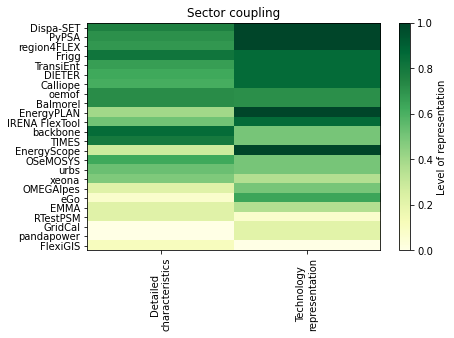

In [36]:
# Plot all models
plot_representation_single(
    weighted_models_sector_df.loc[rating_sector.sort_values(ascending=False).index], 'Sector coupling')

### Detailed Evaluation

In [37]:
#Sector coupling dict
parameters_with_weights_sector_tech = {
    'Supply\ntechnology': {'CHP': 1},
    'Demand\ntechnology': {'P2H2': 1, 'HP': 1, 'EV': 1}, #P2H2 represents P2G here
    'Storage\ntechnology': {'Fuels': 1, 'Heat storage': 1, 'V2G': 1, }, }
parameters_with_weights_sector_char = {
    'Sector\nrepresentation': {'Heat': 1, 'Transport': 1},
    'Technology\nspecifications': {'sector coupling supply': 1,
                                   'sector coupling demand': 1,
                                   'sector coupling storage': 1},
    'Operations': {'efficiency': 1, 'ramping': 1, 'response time': 1,
                'recovery time': 1}
}

In [38]:
weighted_models_sector_tech_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_sector_tech, evaluation_parameters, table_values)
weighted_models_sector_char_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_sector_char, evaluation_parameters, table_values)

Other heat representation specified in model backbone. Please check.
Other transport representation specified in model backbone. Please check.
Model Calliope has not ticket any value for max def load.
Other heat representation specified in model DIETER. Please check.
Other transport representation specified in model DIETER. Please check.
Other heat representation specified in model Dispa-SET. Please check.
Other transport representation specified in model Dispa-SET. Please check.
heat sector not specified for model OMEGAlpes.
Other heat representation specified in model OMEGAlpes. Please check.
Model OMEGAlpes has not ticket any value for max def load.
Other heat representation specified in model region4FLEX. Please check.
Other transport representation specified in model region4FLEX. Please check.
Other heat representation specified in model TransiEnt. Please check.
Other heat representation specified in model xeona. Please check.
Other heat representation specified in model FlexiGIS.

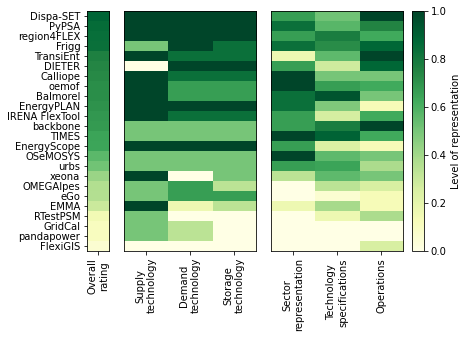

In [39]:
# plot all dual
rating_sector_df = pd.DataFrame(rating_sector.sort_values(ascending=False)).rename(columns={0:'Overall\nrating'})
plot_representation_triple(rating_sector_df, 
    weighted_models_sector_tech_df[parameters_with_weights_sector_tech.keys()].loc[
        rating_sector.sort_values(ascending=False).index], 
    weighted_models_sector_char_df[parameters_with_weights_sector_char.keys()].loc[
        rating_sector.sort_values(ascending=False).index], figsize=(6.5,4.8),
    save_fig_dir=module_path + '/plots/05_sector.pdf')

## Network representation

In [40]:
#Network dict
parameters_with_weights_network = {
    'Technology\nrepresentation':
        {'Distribution Grid': 1, 'Transmission Grid': 1, #'Smart Grid': 1, 'Microgrid': 1, 'interconnectors': 1
         'network extension': 1, 'switches': 1},
    'Detailed\ncharacteristics':
        {'Grid representation': 1, 'import': 1,
                'grid ancillary services': 1}

}

In [41]:
weighted_models_network_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_network, evaluation_parameters, table_values)
rating_network = weighted_models_network_df.sum(axis=1).divide(2)
rating_network.sort_values(ascending=False)*100

Grid representation not specified for model EMMA.
Grid representation not specified for model EnergyPLAN.


eGo               85.166667
PyPSA             68.750000
TIMES             68.750000
TransiEnt         67.166667
xeona             64.333333
pandapower        63.666667
GridCal           61.583333
Balmorel          61.333333
backbone          59.250000
region4FLEX       50.916667
Calliope          50.250000
OSeMOSYS          50.250000
oemof             46.750000
IRENA FlexTool    39.833333
Dispa-SET         37.750000
urbs              30.083333
Frigg             28.000000
DIETER            23.166667
OMEGAlpes         22.916667
EnergyPLAN        20.833333
RTestPSM          19.666667
EMMA              18.750000
FlexiGIS          14.583333
EnergyScope       10.416667
dtype: float64

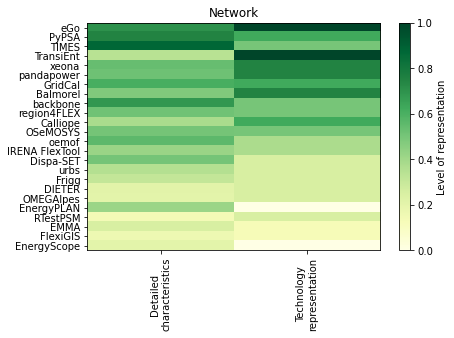

In [42]:
# Plot all models
plot_representation_single(
    weighted_models_network_df.loc[rating_network.sort_values(ascending=False).index], 'Network')

### Detailed Evaluation

In [43]:
#Network dict
parameters_with_weights_network_tech = {
    'Grid types':
        {'Distribution Grid': 1, 'Transmission Grid': 1},
    'Topology': {'network extension': 1, 'switches': 1},}
parameters_with_weights_network_char = {
    'Grid\nrepresen-\ntation':{'Grid representation': 1}, 
    'Import\nexport':{'import': 1},
    'Ancillary\nservices':{'grid ancillary services': 1}

}

In [44]:
weighted_models_network_tech_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_network_tech, evaluation_parameters, table_values)
weighted_models_network_char_df = tools.get_weighted_models_from_evaluation_dicts(
    models, parameters_with_weights_network_char, evaluation_parameters, table_values)

Grid representation not specified for model EMMA.
Grid representation not specified for model EnergyPLAN.


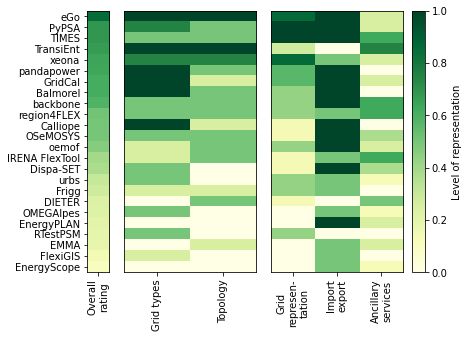

In [45]:
# plot all dual
rating_network_df = pd.DataFrame(rating_network.sort_values(ascending=False)).rename(columns={0:'Overall\nrating'})
plot_representation_triple(rating_network_df, 
    weighted_models_network_tech_df[parameters_with_weights_network_tech.keys()].loc[
        rating_network.sort_values(ascending=False).index], 
    weighted_models_network_char_df[parameters_with_weights_network_char.keys()].loc[
        rating_network.sort_values(ascending=False).index], figsize=(6.5,4.8),
    save_fig_dir=module_path + '/plots/06_network.pdf')

## Holistic representation

In [46]:
# Holistic definition is the concatenated version of all ratings


In [47]:
weighted_models_holistic_df = pd.concat([rating_supply_df.rename(columns={'Overall\nrating':'Supply'}), 
           rating_demand_df.rename(columns={'Overall\nrating':'Demand'}), 
           rating_storage_df.rename(columns={'Overall\nrating':'Storage'}), 
           rating_network_df.rename(columns={'Overall\nrating':'Network'}), 
           rating_sector_df.rename(columns={'Overall\nrating':'Sector\ncoupling'})],
          sort=True, axis=1)
rating_holistic = weighted_models_holistic_df.sum(axis=1).divide(5)
rating_holistic.sort_values(ascending=False)*100

TransiEnt         76.904511
PyPSA             72.485357
Balmorel          69.338513
backbone          67.511376
region4FLEX       67.163005
Dispa-SET         64.763218
Calliope          64.750084
DIETER            64.298051
Frigg             63.986243
TIMES             63.855820
xeona             59.069953
oemof             58.549666
IRENA FlexTool    53.363306
OSeMOSYS          52.060582
urbs              46.087213
EnergyPLAN        44.552446
eGo               44.277833
EnergyScope       42.010559
OMEGAlpes         32.996032
pandapower        30.590476
GridCal           30.173810
FlexiGIS          29.298454
EMMA              27.002297
RTestPSM          18.624227
dtype: float64

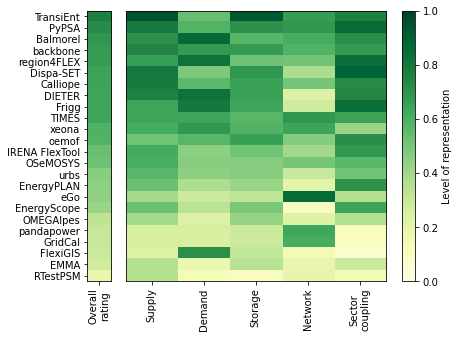

In [48]:
# Plot all models
rating_holistic_df = pd.DataFrame(rating_holistic.sort_values(ascending=False)).rename(columns={0:'Overall\nrating'})
plot_representation_holistic(rating_holistic_df,
    weighted_models_holistic_df.loc[
        rating_holistic.sort_values(ascending=False).index], figsize=(6.5,4.8),
    save_fig_dir=module_path + '/plots/07_holistic.pdf')

In [49]:
weighted_models_holistic_df.loc[
        rating_holistic.sort_values(ascending=False).index]

,Supply,Demand,Storage,Network,Sector coupling
TransiEnt,0.947368,0.535714,0.928571,0.671667,0.761905
PyPSA,0.791353,0.583333,0.707143,0.687500,0.854938
Balmorel,0.706767,0.857143,0.571429,0.613333,0.718254
backbone,0.750000,0.678571,0.678571,0.592500,0.675926
region4FLEX,0.663534,0.821429,0.521429,0.509167,0.842593
Dispa-SET,0.796992,0.488095,0.692857,0.377500,0.882716
Calliope,0.791353,0.559524,0.650000,0.502500,0.734127
DIETER,0.761278,0.821429,0.657143,0.231667,0.743386
Frigg,0.642857,0.797619,0.642857,0.280000,0.835979
TIMES,0.642857,0.642857,0.571429,0.687500,0.648148


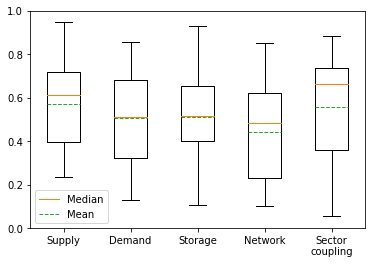

In [50]:
plot_boxplot(weighted_models_holistic_df.transpose(), save_fig=module_path + '/plots/08_boxplot.pdf')

In [51]:
threshold = 0.7

high_representation_supply = rating_supply_df[rating_supply_df > threshold].dropna()
high_representation_demand = rating_demand_df[rating_demand_df > threshold].dropna()
high_representation_storage = rating_storage_df[rating_storage_df > threshold].dropna()
high_representation_network = rating_network_df[rating_network_df > threshold].dropna()
high_representation_sector = rating_sector_df[rating_sector_df > threshold].dropna()

high_representation_df = pd.concat([high_representation_supply, high_representation_demand, 
                                    high_representation_storage, high_representation_network, 
                                    high_representation_sector], axis=1, sort=False)

high_representation_df.columns = ['Supply', 'Demand', 'Storage', 'Network', 'Sector coupling']

print(high_representation_df)


               Supply    Demand   Storage   Network  Sector coupling
TransiEnt    0.947368       NaN  0.928571       NaN         0.761905
Dispa-SET    0.796992       NaN       NaN       NaN         0.882716
Calliope     0.791353       NaN       NaN       NaN         0.734127
PyPSA        0.791353       NaN  0.707143       NaN         0.854938
DIETER       0.761278  0.821429       NaN       NaN         0.743386
backbone     0.750000       NaN       NaN       NaN              NaN
Balmorel     0.706767  0.857143       NaN       NaN         0.718254
region4FLEX       NaN  0.821429       NaN       NaN         0.842593
Frigg             NaN  0.797619       NaN       NaN         0.835979
FlexiGIS          NaN  0.714286       NaN       NaN              NaN
eGo               NaN       NaN       NaN  0.851667              NaN
oemof             NaN       NaN       NaN       NaN         0.718254
EnergyPLAN        NaN       NaN       NaN       NaN         0.700617


In [52]:
weighted_models_holistic_dual_df = pd.concat(
    [weighted_models_supply_df.rename(columns={'Technology\nrepresentation':'Supply tech', 'Detailed\ncharacteristics': 'Supply char'}),
     weighted_models_demand_df.rename(columns={'Technology\nrepresentation':'Demand tech', 'Detailed\ncharacteristics': 'Demand char'}),
     weighted_models_storage_df.rename(columns={'Technology\nrepresentation':'Storage tech', 'Detailed\ncharacteristics': 'Storage char'}),
     weighted_models_network_df.rename(columns={'Technology\nrepresentation':'Network tech', 'Detailed\ncharacteristics': 'Network char'}),
     weighted_models_sector_df.rename(columns={'Technology\nrepresentation':'Sector tech', 'Detailed\ncharacteristics': 'Sector char'})],
    sort=True, axis=1)

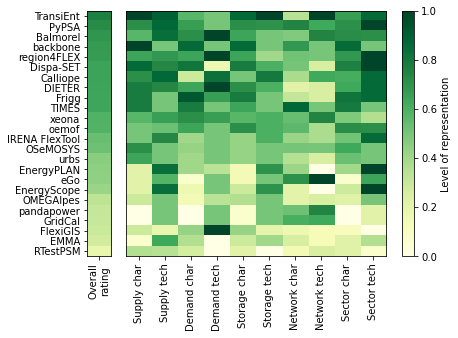

In [53]:
plot_representation_holistic(rating_holistic_df,
    weighted_models_holistic_dual_df.loc[
        rating_holistic.sort_values(ascending=False).index], figsize=(6.5,4.8),
    )

# Appendix

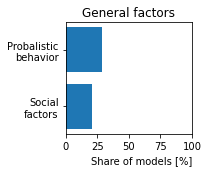

In [54]:
generalfactors = table_values.loc[:, ['prob yes', 'social yes']].sum()
plot_bar_horizontal(
        generalfactors, ['Probalistic\nbehavior', 'Social\nfactors'],
        title='General factors', max_val=nr_of_surveys, figsize=(3., 2.5),
    save_fig_dir=module_path + '/plots/a00a_paper_general_factors.pdf')

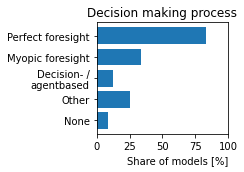

In [55]:
decisionmaking = table_values.loc[:, 'perfect foresight':'other decision making'].sum()
decisionmaking['other decision making'] = len(table_values['other decision making'].to_numpy().nonzero()[0])
decisionmaking['no decision making'] = table_values.loc[:, 'no decision making'].sum()
plot_bar_horizontal(
    decisionmaking, ['Perfect foresight','Myopic foresight', 'Decision- /\nagentbased', 
                     'Other', 'None'],
    title='Decision making process', max_val=nr_of_surveys,
    save_fig_dir=module_path + '/plots/a00b_paper_decision_making.pdf')


In [56]:
table_values['other decision making']

Model / framework
eGo                          AC-OPF, Heuristic as perfect foresight
backbone          stochastic (short-term forecasts and/or long-t...
Calliope                                                          0
DIETER                                                            0
Dispa-SET                                                         0
EMMA                                                              0
EnergyPLAN        The model in some cases have perfect foresight...
EnergyScope                                                       0
oemof                                                             0
OMEGAlpes                                                         0
PyPSA                                                             0
region4FLEX                                                       0
RTestPSM                                                          0
TIMES                                                        yearly
TransiEnt                     

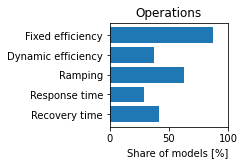

In [57]:
flex_specs = table_values.loc[:, ['efficiency fixed value', 'efficiency function', 
                              'ramping yes', 'response time yes', 'recovery time yes']].sum()
plot_bar_horizontal(
        flex_specs, ['Fixed efficiency', 'Dynamic efficiency', 'Ramping', 'Response time', 'Recovery time'],
        title='Operations', max_val=nr_of_surveys, figsize=(3.5, 2.4), 
    save_fig_dir=str(cur_dir) + '/plots/a00c_paper_flex_spec.pdf')

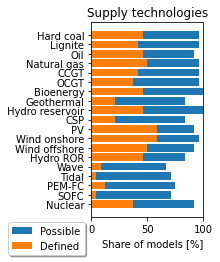

In [58]:
# plot which supply technologies are represented to what extent
convPP = table_values.loc[:, 'hard coal/pos':'OCGT/def'].sum()
dispRES = table_values.loc[:, 'Bioenergy/pos':'concentrated solar power/def'].sum()
vRES = table_values.loc[:, 'photovoltaic/pos':'tidal power/def'].sum()
other_supply = table_values.loc[:, 'PEM-FC/pos':'Nuclear/def'].sum()

supply = pd.concat([convPP, dispRES, vRES, other_supply])

plot_bar_horizontal(
    series=supply,
    x_labels=['Hard coal', 'Lignite', 'Oil', 'Natural gas',
              'CCGT', 'OCGT', 'Bioenergy', 'Geothermal',
              'Hydro reservoir', 'CSP', 'PV', 'Wind onshore',
              'Wind offshore', 'Hydro ROR', 'Wave', 'Tidal',
              'PEM-FC', 'SOFC', 'Nuclear'],
    title='Supply technologies', max_val=nr_of_surveys, label_name = 'pos_def', figsize=(3.5, 3.75),
bbox_to_anchor=(-0.4,0.), save_fig_dir=str(cur_dir) + '/plots/a01a_paper_supply_tech.pdf')

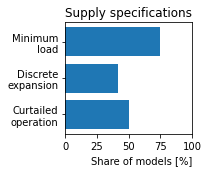

In [59]:
tech_representation = table_values.loc[:, ['minimum load yes', 'discrete expansion yes', 
                                          'curtailed operation yes']].sum()
plot_bar_horizontal(
        tech_representation, ['Minimum\nload', 'Discrete\nexpansion', 'Curtailed\noperation'],
        title='Supply specifications', max_val=nr_of_surveys, figsize=(3, 2.5), 
    save_fig_dir=str(cur_dir) + '/plots/a01b_paper_supply_spec.pdf')

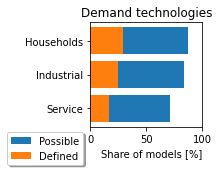

In [60]:
# plot which demand technologies are represented to what extent
demand = table_values.loc[:, 'households/pos':'service sector/def'].sum()

plot_bar_horizontal(
    series=demand,
    x_labels=['Households', 'Industrial', 'Service'],
    title='Demand technologies', max_val=nr_of_surveys, label_name='pos_def',
bbox_to_anchor=(-0.4, 0.), save_fig_dir=str(cur_dir) + '/plots/a02a_paper_demand_tech.pdf')

In [61]:
# plot only highest rated options
tmp_tech_representation_demand = pd.concat([table_values.loc[:, 'max def load fixed value': 'no max def load'],
                                       table_values.loc[:, ['shifting time yes']]], axis=1)
tmp_tech_representation_demand['max def load fixed value'] = \
    tmp_tech_representation_demand['max def load fixed value']*(1-tmp_tech_representation_demand['time- and type-dependent'])*\
    (1-tmp_tech_representation_demand['Time-dependent'])*(1-tmp_tech_representation_demand['Type-dependent'])
tmp_tech_representation_demand['Time-dependent'] = \
    tmp_tech_representation_demand['Time-dependent']*(1-tmp_tech_representation_demand['time- and type-dependent'])
tmp_tech_representation_demand['Type-dependent'] = \
    tmp_tech_representation_demand['Type-dependent']*(1-tmp_tech_representation_demand['time- and type-dependent'])

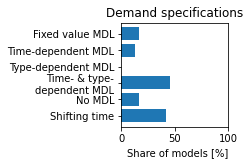

In [62]:
tech_representation_demand = tmp_tech_representation_demand.sum()
plot_bar_horizontal(
        tech_representation_demand, ['Fixed value MDL', 'Time-dependent MDL', 'Type-dependent MDL', 'Time- & type-\ndependent MDL', 'No MDL', 'Shifting time'],
        title='Demand specifications', max_val=nr_of_surveys, figsize=(3.5, 2.4), 
    save_fig_dir=str(cur_dir) + '/plots/a02b_paper_demand_spec.pdf')

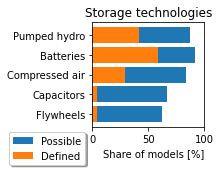

In [63]:
# plot which storage technologies are represented to what extent
storage = table_values.loc[:, 'PHS/pos':'Flywheels/def'].sum()

plot_bar_horizontal(
    series=storage,
    x_labels=['Pumped hydro', 'Batteries', 'Compressed air', 'Capacitors', 'Flywheels'],
    title='Storage technologies', max_val=nr_of_surveys, label_name='pos_def',
bbox_to_anchor=(-0.4, 0.), save_fig_dir=str(cur_dir) + '/plots/a03a_paper_storage_tech.pdf')

In [64]:
# plot only highest rated options
tmp_tech_representation_storage = table_values.loc[:, ['fixed/static', 'dynamic', 'cycle aging', 'calendrical aging', 'self discharge yes']]
tmp_tech_representation_storage['fixed/static'] = tmp_tech_representation_storage['fixed/static'] * (1-tmp_tech_representation_storage['dynamic'])

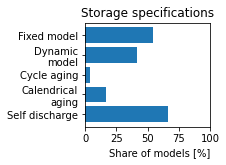

In [65]:
tech_representation_storage = tmp_tech_representation_storage.sum()

plot_bar_horizontal(
        tech_representation_storage, ['Fixed model', 'Dynamic\nmodel', 'Cycle aging', 'Calendrical\naging', 'Self discharge'],
        title='Storage specifications', max_val=nr_of_surveys, figsize=(3.25, 2.4), 
    save_fig_dir=str(cur_dir) + '/plots/a03b_paper_storage_spec.pdf')

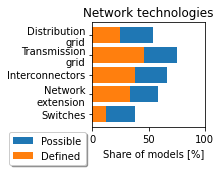

In [66]:
# plot which network technologies are represented to what extent
network = table_values.loc[:, ['Distribution Grid/pos', 'Distribution Grid/def',
                               'Transmission Grid/pos', 'Transmission Grid/def',
                              'interconnectors/pos', 'interconnectors/def',
                              'network extension/pos', 'network extension/def',
                               'switches/pos', 'switches/def']].sum()

plot_bar_horizontal(
    series=network,
    x_labels=['Distribution\ngrid', 'Transmission\ngrid', 'Interconnectors', 'Network\nextension', 'Switches'],
    title='Network technologies', max_val=nr_of_surveys, label_name = 'pos_def',
bbox_to_anchor=(-0.4, 0.), save_fig_dir=str(cur_dir) + '/plots/a04a_paper_network_tech.pdf')

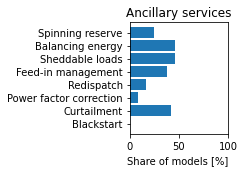

In [67]:
ancillary_services = table_values.loc[:, 'spinning reserve':'black start' ].sum()
plot_bar_horizontal(
        ancillary_services, ['Spinning reserve', 'Balancing energy', 'Sheddable loads',
                            'Feed-in management', 'Redispatch', 'Power factor correction', 
                             'Curtailment', 'Blackstart'],
        title='Ancillary services', max_val=nr_of_surveys,  
    save_fig_dir=str(cur_dir) + '/plots/a04b_ancillary_services.pdf')

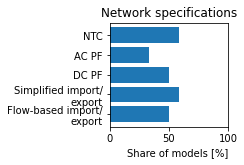

In [68]:
tech_representation_network = table_values.loc[:, ['transfer capacity', 'AC PF', 'DC PF', 
                                                  'simplified', 'flow based', 'other import']].sum()

plot_bar_horizontal(
        tech_representation_network, ['NTC', 'AC PF', 'DC PF', 'Simplified import/\nexport', 
                                     'Flow-based import/\nexport'],
        title='Network specifications', max_val=nr_of_surveys, figsize=(3.5, 2.4), 
    save_fig_dir=str(cur_dir) + '/plots/a04c_paper_network_spec.pdf')

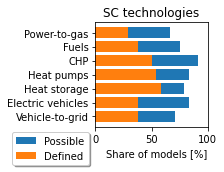

In [69]:
# plot which sector coupling technologies are represented to what extent
sector = table_values.loc[:, ['P2Gas/pos', 'P2Gas/def',
                               'Fuels (H2)/pos', 'Fuels (H2)/def',
                              'CHP/pos', 'CHP/def', 
                              'HP/pos', 'HP/def',
                              'Heat storage/pos', 'Heat storage/def',
                               'EV/pos', 'EV/def', 'V2Grid/pos', 'V2Grid/def']].sum()

plot_bar_horizontal(
    series=sector,
    x_labels=['Power-to-gas', 'Fuels', 'CHP', 'Heat pumps', 'Heat storage', 'Electric vehicles', 'Vehicle-to-grid'],
    title='SC technologies', max_val=nr_of_surveys, label_name = 'pos_def',
bbox_to_anchor=(-0.4,0.), save_fig_dir=str(cur_dir) + '/plots/a05a_paper_sector_tech.pdf')

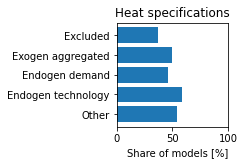

In [70]:
tech_representation_heat = table_values.loc[:, 'heat sector excluded':'transport sector excluded'].sum()

plot_bar_horizontal(
        tech_representation_heat, ['Excluded', 'Exogen aggregated', 'Endogen demand', 'Endogen technology', 
                                     'Other'],
        title='Heat specifications', max_val=nr_of_surveys, figsize=(3.5, 2.4), 
    save_fig_dir=str(cur_dir) + '/plots/a05b_paper_heat_spec.pdf')

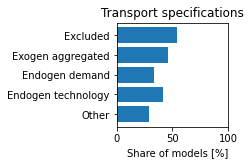

In [71]:
tech_representation_transport = table_values.loc[:, 'transport sector excluded':'prob yes'].sum()

plot_bar_horizontal(
        tech_representation_transport, ['Excluded', 'Exogen aggregated', 'Endogen demand', 'Endogen technology', 
                                     'Other'],
        title='Transport specifications', max_val=nr_of_surveys, figsize=(3.5, 2.4), 
    save_fig_dir=str(cur_dir) + '/plots/a05c_paper_transport_spec.pdf')